In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import pylab

filename = "data.csv"
df = pd.read_csv(filename)
df_nasa = pd.read_csv("data_nasa.csv")
df_final = pd.read_csv("data_final.csv")

godspeed_all = [column for column in df.columns if "Godspeed" in column]
tlx_all = [column for column in df.columns if "NASA" in column and "rating" in column]
tlx_all_weighted = [column for column in df_nasa.columns if "NASA" in column and "weighted" in column]

godspeed_pi = ['Godspeed Incompetent', 'Godspeed Ignorant', 'Godspeed Irresponsible', 'Godspeed Unintelligent', 'Godspeed Foolish']  # Godpseed's perceived intelligence
godspeed_s = ['Godspeed Anxious', 'Godspeed Agitated', 'Godspeed Quiescent']  # Godspeed's safety items

df_trust_1 = df[[column for column in df.columns if "T1" in column]]
df_trust_2 = df[[column for column in df.columns if "T2" in column]]

df_godspeed_pi = df[godspeed_pi]
df_godspeed_s = df[godspeed_s]
df_tlx_rating = df[tlx_all]

def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [2]:
print(CronbachAlpha(df_trust_2))

0.7734942809669714


In [3]:
df_trust_1.head()

,T1 Dependable,T1 Reliable,T1 -R- Unresponsive,T1 Predictable,T1 ActConsistently,T1 FunctionSuccessfully,T1 -R- Malfunction,T1 -R- HaveErrors,T1 ProvideFeedback,T1 MeetTheNeeds,T1 ProvideAppropriateInformation,T1 CommunicateWithPeople,T1 Perform exactly as instructed,T1 Follow Directions
0,60,50,20,50,40,40,30,20,0,80,0,0,80,0
1,80,80,20,80,90,90,10,10,0,90,50,0,90,100
2,50,50,0,100,100,100,0,0,0,50,100,100,100,0
3,90,80,10,90,90,90,10,10,40,70,80,50,90,90
4,60,70,30,80,90,70,20,20,100,80,70,60,70,80


In [4]:
for column in df_trust_1.columns:
    if "-R-" in column:
        df_trust_1.loc[:, column] = df_trust_1[column].apply(lambda x: 100 - x)
        #df_trust_1[column] = 100 - df_trust_1[column]
        
for column in df_trust_2.columns:
    if "-R-" in column:
        df_trust_2.loc[:, column] = df_trust_2[column].apply(lambda x: 100 - x)
        #df_trust_1[column] = 100 - df_trust_1[column]
        
df_trust_1.head()

C:\Users\dorte\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,T1 Dependable,T1 Reliable,T1 -R- Unresponsive,T1 Predictable,T1 ActConsistently,T1 FunctionSuccessfully,T1 -R- Malfunction,T1 -R- HaveErrors,T1 ProvideFeedback,T1 MeetTheNeeds,T1 ProvideAppropriateInformation,T1 CommunicateWithPeople,T1 Perform exactly as instructed,T1 Follow Directions
0,60,50,80,50,40,40,70,80,0,80,0,0,80,0
1,80,80,80,80,90,90,90,90,0,90,50,0,90,100
2,50,50,100,100,100,100,100,100,0,50,100,100,100,0
3,90,80,90,90,90,90,90,90,40,70,80,50,90,90
4,60,70,70,80,90,70,80,80,100,80,70,60,70,80


In [5]:
print(CronbachAlpha(df_trust_2))

0.8559637536990287


In [6]:
df_gamescores = df[["Condition", "G2 Total"]]
df_gamescores.groupby("Condition").describe()

G2 Total                                                 
             count  mean        std   min    25%   50%    75%   max
Condition                                                          
0             10.0  37.6   5.378971  31.0  33.25  36.0  41.00  46.0
1             10.0  47.9   5.801341  38.0  45.25  47.0  52.75  56.0
2             10.0  43.1   6.505553  35.0  40.00  42.0  44.00  55.0
3             10.0  43.5  10.946841  21.0  43.25  46.5  51.50  53.0

In [53]:
df_gamescores.describe()


,Condition,G2 Total
count,40.000000,40.000000
mean,1.500000,43.025000
std,1.132277,8.097127
min,0.000000,21.000000
25%,0.750000,38.000000
50%,1.500000,44.000000
75%,2.250000,48.250000
max,3.000000,56.000000


# Assumption of Normality

In [7]:
df_gamescores_visual = df_gamescores[df_gamescores["Condition"] == "visual"]["G2 Total"]
df_gamescores_written = df_gamescores[df_gamescores["Condition"] == "written"]["G2 Total"]
df_gamescores_all = df_gamescores[df_gamescores["Condition"] == "all"]["G2 Total"]
df_gamescores_control = df_gamescores[df_gamescores["Condition"] == "control"]["G2 Total"]
# Shapiro-Wilk test
stats.shapiro(df_gamescores["G2 Total"])

C:\Users\dorte\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(0.9698280692100525, 0.35542356967926025)

In [8]:
stats.levene(df_gamescores_visual, df_gamescores_written, df_gamescores_all, df_gamescores_control)

C:\Users\dorte\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dorte\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


LeveneResult(statistic=nan, pvalue=nan)

In [9]:
def normalityCheck(data, col):
    print('--------{}--------'.format(col))
    # fit a normal distribution to your data and then check if the data
    # and the distribution are the same using the Kolmogorov–Smirnov test
    # create a normal distribution with loc and scale
    loc, scale = stats.norm.fit(data)
    n = stats.norm(loc=loc, scale=scale)
    print('D =%6.3f, p = %6.4f' % stats.kstest(data,  n.cdf))
    stat, p = stats.shapiro(data)
    print('W = %.3f, p = %.3f' % (stat, p))

normalityCheck(df_gamescores["G2 Total"], "G2 Total")

--------G2 Total--------
D = 0.078, p = 0.9696
W = 0.970, p = 0.355


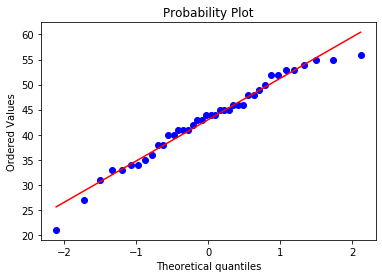

In [10]:
stats.probplot(df_gamescores["G2 Total"], dist="norm", plot=pylab)
pylab.show()

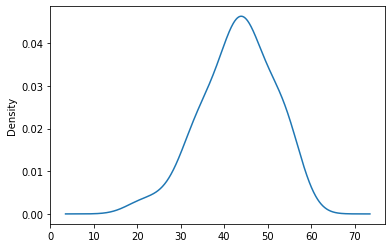

In [11]:
df_gamescores["G2 Total"].plot.kde()

In [40]:
stats.f_oneway(df_gamescores_visual, df_gamescores_written, df_gamescores_all, df_gamescores_control)

C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\stats.py:3333: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
C:\Users\dorte\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\stats.py:3336: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
C:\Users\dorte\Anaconda3\lib\site-packages\scipy\stats\stats.py:3343: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign


F_onewayResult(statistic=nan, pvalue=nan)

In [13]:
stats.ttest_ind(df_gamescores_written, df_gamescores_visual)

Ttest_indResult(statistic=nan, pvalue=nan)

In [14]:
df_nasaOverall_visual = df[df["Condition"] == "visual"]["NASA overall"]
df_nasaOverall_written = df[df["Condition"] == "written"]["NASA overall"]
df_nasaOverall_all = df[df["Condition"] == "all"]["NASA overall"]
df_nasaOverall_control = df[df["Condition"] == "control"]["NASA overall"]
df_nasa = df[["Condition", "NASA overall"]]
df_g2 = df[["Condition", "G2 Total"]]

C:\Users\dorte\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


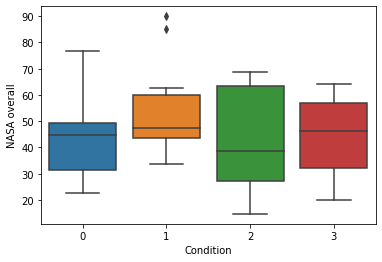

In [15]:
sb.boxplot(x="Condition", y="NASA overall", data=df_nasa)

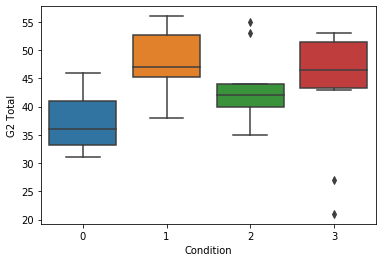

In [16]:
sb.boxplot(x="Condition", y="G2 Total", data=df_g2)

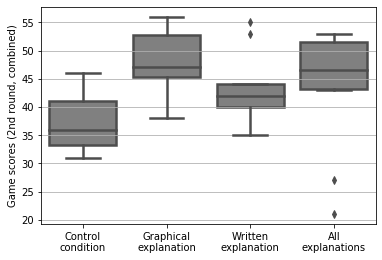

In [17]:
ax = sb.boxplot(x="Condition", y="G2 Total", data=df_g2, color='grey', linewidth=2.5)
ax.set(xlabel='', ylabel='Game scores (2nd round, combined)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.grid(axis='y')
#plt.title("Game scores for the 2nd round")
plt.show()

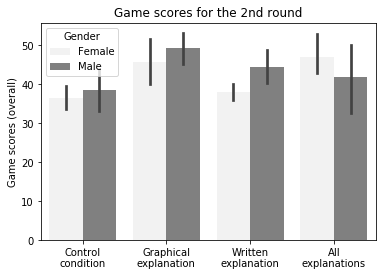

In [18]:
df_g2_gender = df[["Condition", "G2 Total", "Gender"]]
ax = sb.barplot(x="Condition", y="G2 Total", hue="Gender", data=df_g2_gender, color='grey')
ax.set(xlabel='', ylabel='Game scores (overall)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
plt.title("Game scores for the 2nd round")
plt.show()

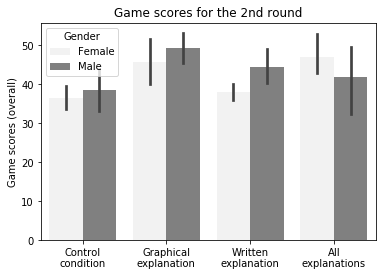

In [19]:
df_g2_gender = df[["Condition", "G2 Total", "Gender"]]
ax = sb.barplot(x="Condition", y="G2 Total", hue="Gender", data=df_g2_gender, color='grey')
ax.set(xlabel='', ylabel='Game scores (overall)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
plt.title("Game scores for the 2nd round")
plt.show()

# Creating weighted NASA TLX scores

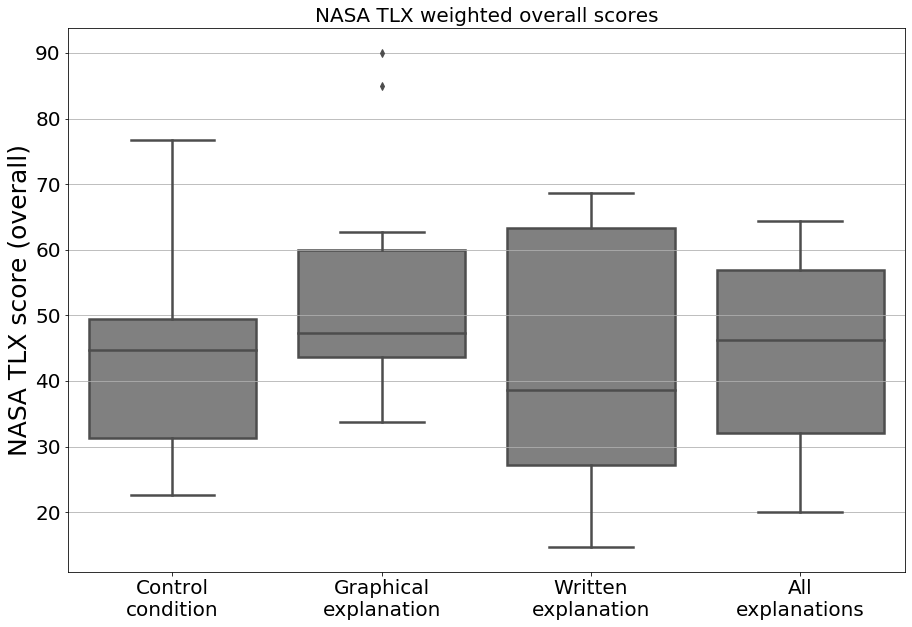

In [156]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 200

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = [15, 10]
ax = sb.boxplot(x="Condition", y="NASA overall", data=df_nasa, color='grey', linewidth=2.5)
ax.set(xlabel='', ylabel='NASA TLX score (overall)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.grid(axis='y')
plt.title("NASA TLX weighted overall scores")
plt.show()

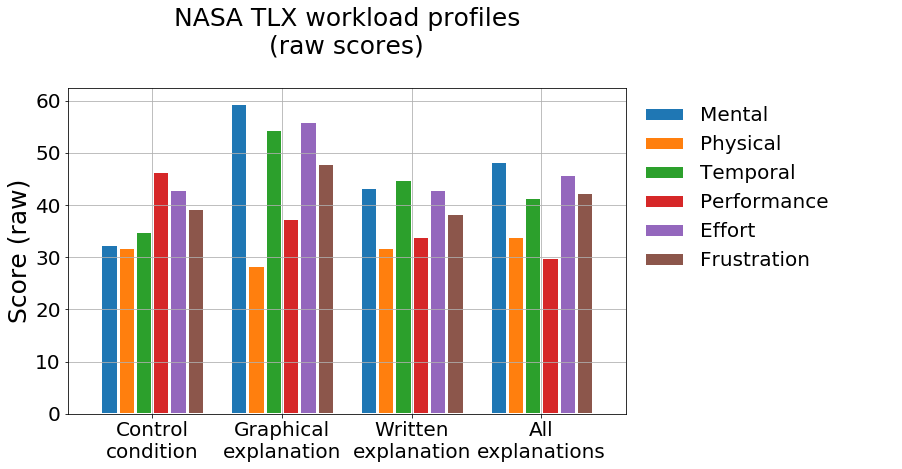

In [267]:
plt.rcParams['figure.figsize'] = [10, 6]
df_tlx = df[tlx_all + ["Condition"]]
df_tlx_g = df_tlx.groupby("Condition").mean()
df_tlx_g.reset_index(inplace=True)
ax = df_tlx_g.plot(x="Condition", y=tlx_all, kind="bar", align='center', width=0.8, edgecolor='white', linewidth=3)
ax.set(xlabel='', ylabel='Score (raw)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
#ax.legend(loc="best",bbox_to_anchor=(0.8, 0., 0.5, 1), labels = ["Mental", "Physical", "Temporal", "Performance", "Effort", "Frustration"], fontsize = 15)#tlx_all, ['label1', 'label2', 'label3','label3','label3','label3'])
plt.title("NASA TLX workload profiles\n(raw scores)\n", fontsize=25)
ax.legend(frameon=False, mode="expand",loc="best",bbox_to_anchor=(1, 0., 0.5, 1), labels = ["Mental", "Physical", "Temporal", "Performance", "Effort", "Frustration"], fontsize = 20)#tlx_all, ['label1', 'label2', 'label3','label3','label3','label3'])
plt.xticks(rotation = 0)
plt.grid()
#ax.get_legend().remove()
plt.show()

In [37]:
df_g2_control = df_g2[df_g2["Condition"] == 0]["G2 Total"]
df_g2_visual = df_g2[df_g2["Condition"] == 1]["G2 Total"]
df_g2_written = df_g2[df_g2["Condition"] == 2]["G2 Total"]
df_g2_all = df_g2[df_g2["Condition"] == 3]["G2 Total"]

In [39]:
print(stats.ttest_ind(df_g2_control, df_g2_visual))
print(stats.ttest_ind(df_g2_control, df_g2_written))
print(stats.ttest_ind(df_g2_control, df_g2_all))
print(stats.ttest_ind(df_g2_visual, df_g2_written))
print(stats.ttest_ind(df_g2_visual, df_g2_all))
print(stats.ttest_ind(df_g2_all, df_g2_written))

Ttest_indResult(statistic=-4.117073343619302, pvalue=0.0006471680894599969)
Ttest_indResult(statistic=-2.0604084592303358, pvalue=0.05411518356856637)
Ttest_indResult(statistic=-1.5296750938997317, pvalue=0.14348130561683203)
Ttest_indResult(statistic=1.7413976091708883, pvalue=0.09867751871929532)
Ttest_indResult(statistic=1.1230890821453352, pvalue=0.2761565923921231)
Ttest_indResult(statistic=0.09933311964472209, pvalue=0.9219717032391587)


In [41]:
stats.f_oneway(df_g2_control, df_g2_visual, df_g2_written, df_g2_all)

F_onewayResult(statistic=3.169674197854353, pvalue=0.03588553883341805)

In [52]:
print(df_g2_visual.describe())
print("-----------")
print(df_g2_control.describe())
print("-----------")
print(df_g2_written.describe())
print("-----------")
print(df_g2_all.describe())
print("-----------")

count    10.000000
mean     47.900000
std       5.801341
min      38.000000
25%      45.250000
50%      47.000000
75%      52.750000
max      56.000000
Name: G2 Total, dtype: float64
-----------
count    10.000000
mean     37.600000
std       5.378971
min      31.000000
25%      33.250000
50%      36.000000
75%      41.000000
max      46.000000
Name: G2 Total, dtype: float64
-----------
count    10.000000
mean     43.100000
std       6.505553
min      35.000000
25%      40.000000
50%      42.000000
75%      44.000000
max      55.000000
Name: G2 Total, dtype: float64
-----------
count    10.000000
mean     43.500000
std      10.946841
min      21.000000
25%      43.250000
50%      46.500000
75%      51.500000
max      53.000000
Name: G2 Total, dtype: float64
-----------


In [47]:
t= -4.117073343619302
(t**2/(t**2 + 18))**0.5

0.6964071058962975

In [59]:
#SS_T = sum((x_i - x_grand)**2)

Xmean = 43.025
std = 8.097127
#df_gamescores = sum()
SS_T = std**2 * 39
SS_T_2 = sum([(x-Xmean)**2 for x in df_gamescores["G2 Total"]])

In [61]:
SS_T_2, SS_T # df_T = 39

(2556.975000000001, 2556.9751605110314)

In [67]:
SS_M = sum([x.count()*(x.mean() - Xmean)**2 for x in [df_g2_control, df_g2_visual, df_g2_written, df_g2_all]])
SS_R = sum([(x.std()**2)*(x.count() - 1) for x in [df_g2_control, df_g2_visual, df_g2_written, df_g2_all]])

In [71]:
# Model Sum of Squares
SS_M 
df_M = 3

In [70]:
# Residual Sum of Squares
SS_R
df_R = 36

In [72]:
SS_R + SS_M

2556.9749999999995

In [73]:
# Mean Squared Error
MS_M = SS_M / df_M
MS_R = SS_R / df_R

In [74]:
F = MS_M / MS_R
F

3.1696741978543517

In [75]:
(SS_M / SS_T) ** 0.5

0.4571083682132606

In [83]:
df_vis = df[df["Condition"] == 1]
df_wri = df[df["Condition"] == 2]
df_all = df[df["Condition"] == 3]
df_con = df[df["Condition"] == 0]
stats.kruskal(df_vis["NASA overall"], df_wri["NASA overall"], df_all["NASA overall"], df_con["NASA overall"])

KruskalResult(statistic=1.9772586546580422, pvalue=0.5771401475865547)

In [78]:
df_nasaOverall_visual.head()

Series([], Name: NASA overall, dtype: float64)

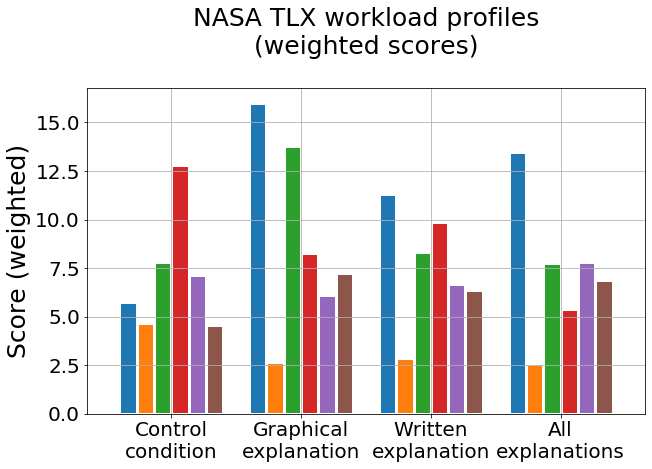

In [269]:
plt.rcParams['figure.figsize'] = [10, 6]
df_tlx = df_nasa[tlx_all_weighted + ["Condition"]]
df_tlx_g = df_tlx.groupby("Condition").mean()
df_tlx_g.reset_index(inplace=True)
ax = df_tlx_g.plot(x="Condition", y=tlx_all_weighted, kind="bar", align='center',  width=0.8, edgecolor='white', linewidth=3)
ax.set(xlabel='', ylabel='Score (weighted)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.legend(loc="best",bbox_to_anchor=(0.8, 0., 0.5, 1), labels = ["Mental", "Physical", "Temporal", "Performance", "Effort", "Frustration"], fontsize = 15)#tlx_all, ['label1', 'label2', 'label3','label3','label3','label3'])
plt.title("NASA TLX workload profiles\n(weighted scores)\n", fontsize=25)
plt.xticks(rotation = 0)
ax.get_legend().remove()
plt.grid()
plt.show()


In [171]:
df_tlx_weighted = df_nasa[tlx_all_weighted + ["Condition"]]

df_tlx_w_vis = df_tlx_weighted[df_tlx_weighted["Condition"] == 1]
df_tlx_w_wri = df_tlx_weighted[df_tlx_weighted["Condition"] == 2]
df_tlx_w_all = df_tlx_weighted[df_tlx_weighted["Condition"] == 3]
df_tlx_w_con = df_tlx_weighted[df_tlx_weighted["Condition"] == 0]
test_col = "NASA Mental weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=7.952704225352106, pvalue=0.04699934674835057)

In [172]:
test_col = "NASA Frustration weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=0.12526686999618916, pvalue=0.9886417649239782)

In [173]:
test_col = "NASA Effort weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=0.2421245421245638, pvalue=0.9705184702070666)

In [174]:
test_col = "NASA Temporal weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=3.5831204208153293, pvalue=0.3101406123863121)

In [175]:
test_col = "NASA Performance weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=5.69766197183101, pvalue=0.1272827809871181)

In [176]:
test_col = "NASA Physical weighted score"
stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])

KruskalResult(statistic=0.4548224416894307, pvalue=0.9286985118640431)

In [177]:
test_col = "NASA Mental weighted score"
#stats.kruskal(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col], df_tlx_w_all[test_col], df_tlx_w_con[test_col])
print(stats.mannwhitneyu(df_tlx_w_con[test_col], df_tlx_w_vis[test_col]))
print(stats.mannwhitneyu(df_tlx_w_con[test_col], df_tlx_w_wri[test_col]))
print(stats.mannwhitneyu(df_tlx_w_con[test_col], df_tlx_w_all[test_col]))
print(stats.mannwhitneyu(df_tlx_w_vis[test_col], df_tlx_w_wri[test_col]))
print(stats.mannwhitneyu(df_tlx_w_vis[test_col], df_tlx_w_all[test_col]))
print(stats.mannwhitneyu(df_tlx_w_all[test_col], df_tlx_w_wri[test_col]))

MannwhitneyuResult(statistic=15.0, pvalue=0.004554248199015482)
MannwhitneyuResult(statistic=38.5, pvalue=0.2027511500649954)
MannwhitneyuResult(statistic=16.5, pvalue=0.006239082709528225)
MannwhitneyuResult(statistic=36.5, pvalue=0.1627847033704996)
MannwhitneyuResult(statistic=42.0, pvalue=0.28515764798751303)
MannwhitneyuResult(statistic=41.5, pvalue=0.2721442036716346)


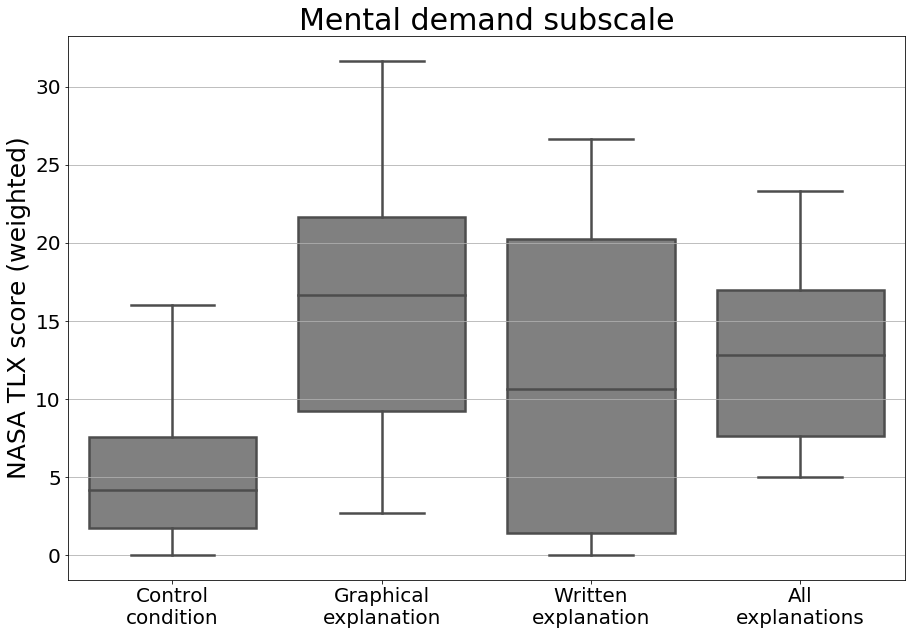

In [189]:
plt.rcParams['figure.figsize'] = [15, 10]
ax = sb.boxplot(x="Condition", y="NASA Mental weighted score", data=df_nasa, color='grey', linewidth=2.5)
ax.set(xlabel='', ylabel='NASA TLX score (weighted)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.grid(axis='y')
plt.title("Mental demand subscale", fontsize=30)
plt.show()

In [192]:
df_tlx_w_con[test_col].median()

4.165

In [201]:
df_tlx_w_vis[test_col].median()

16.648310000000002

In [200]:
stats.spearmanr(df_tlx_w_con[test_col], df_tlx_w_vis[test_col])

SpearmanrResult(correlation=0.09090909090909088, pvalue=0.8027717312071619)

In [202]:
stats.ttest_ind(df_g2_visual, df_g2_written)

Ttest_indResult(statistic=1.7413976091708883, pvalue=0.09867751871929532)

C:\Users\dorte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
df_godspeed = df_nasa[["Condition", "Godspeed PI Score"]]

df_godspeed_pi_vis = df_godspeed[df_godspeed["Condition"] == 1]
df_godspeed_pi_wri = df_godspeed[df_godspeed["Condition"] == 2]
df_godspeed_pi_all = df_godspeed[df_godspeed["Condition"] == 3]
df_godspeed_pi_con = df_godspeed[df_godspeed["Condition"] == 0]

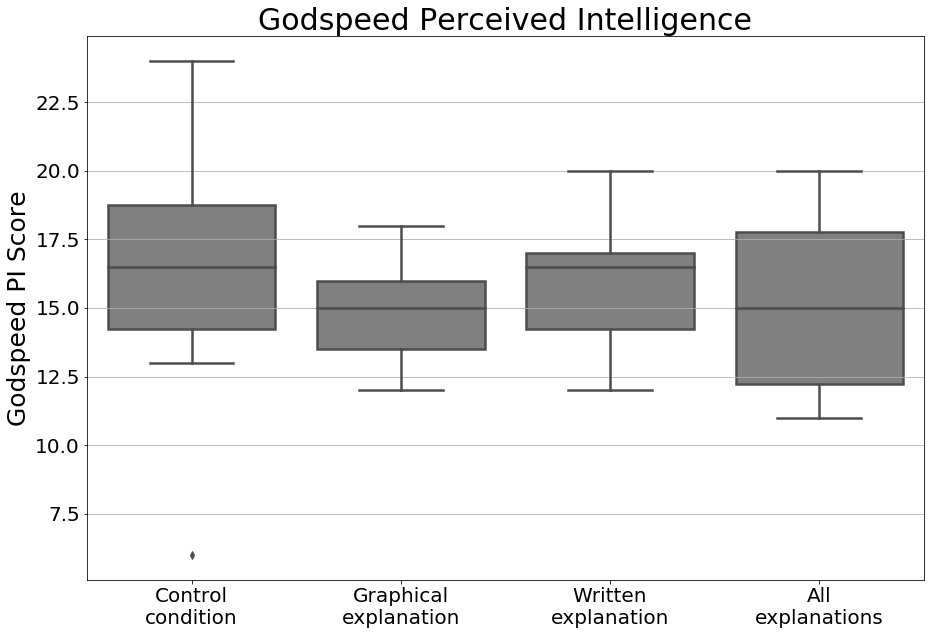

In [219]:
plt.rcParams['figure.figsize'] = [15, 10]
ax = sb.boxplot(x="Condition", y="Godspeed PI Score", data=df_nasa, color='grey', linewidth=2.5)
ax.set(xlabel='', ylabel='Godspeed PI Score')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.grid(axis='y')
plt.title("Godspeed Perceived Intelligence", fontsize=30)
plt.show()

In [220]:
test_col = 'Godspeed PI Score'
stats.kruskal(df_godspeed_pi_vis[test_col], df_godspeed_pi_wri[test_col], df_godspeed_pi_all[test_col], df_godspeed_pi_con[test_col])

KruskalResult(statistic=1.9429589509692309, pvalue=0.5843297820656597)

0     24
1     30
2     34
3     34
4     28
5     32
6     32
7     24
8     24
9     30
10    30
11    36
12    40
13    30
14    32
15    26
16    36
17    28
18    34
19    32
20    30
21    32
22    48
23    26
24    24
25    36
26    40
27    36
28    22
29    26
30    24
31    28
32    28
33    38
34    38
35    12
36    34
37    36
38    36
39    30
dtype: int64

In [227]:
df_trust = df_nasa[["Condition", "T Diff"]]

df_trust_vis = df_trust[df_trust["Condition"] == 1]
df_trust_wri = df_trust[df_trust["Condition"] == 2]
df_trust_all = df_trust[df_trust["Condition"] == 3]
df_trust_con = df_trust[df_trust["Condition"] == 0]

In [229]:
test_col = "T Diff"
stats.kruskal(df_trust_vis[test_col], df_trust_wri[test_col], df_trust_all[test_col], df_trust_con[test_col])

KruskalResult(statistic=4.339885424492871, pvalue=0.22702455124293364)

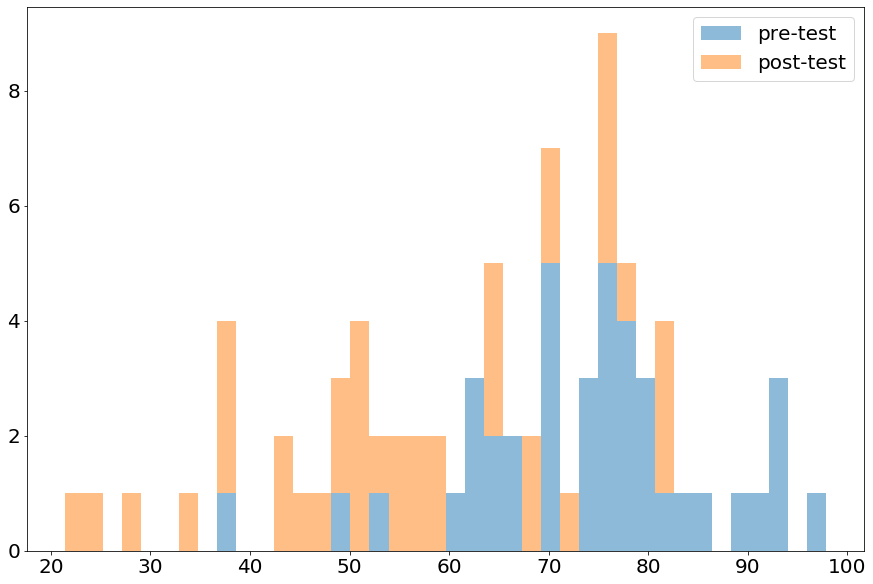

In [239]:
df_trust_diff = df_nasa[["Condition", "T Diff", "T1 Total Score", "T2 Total Score"]]
bins=40
plt.hist([df_trust_diff["T1 Total Score"], df_trust_diff["T2 Total Score"]], bins=bins, label=["pre-test", "post-test"], histtype="barstacked", alpha=0.5);
plt.legend()

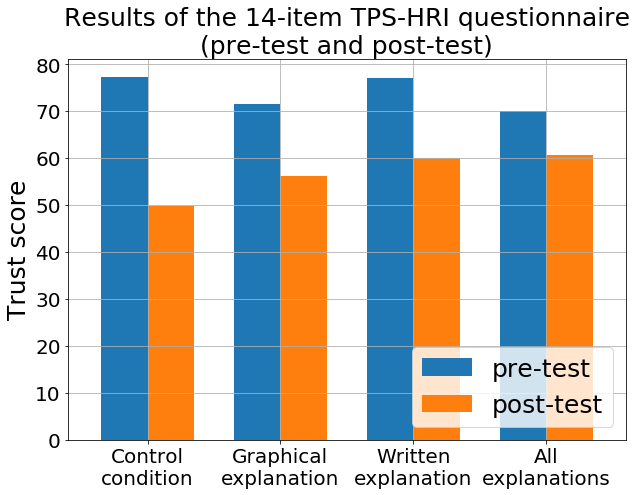

In [253]:
plt.rcParams['figure.figsize'] = [10, 7]
df_trust_diff = df_nasa[["Condition", "T1 Total Score", "T2 Total Score"]]
df_trust_diff_g = df_trust_diff.groupby("Condition").mean()
df_trust_diff_g.reset_index(inplace=True)
ax = df_trust_diff_g.plot(x="Condition", y=["T1 Total Score", "T2 Total Score"], kind="bar", align='center', width=.7)
ax.set(xlabel='', ylabel='Trust score')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.legend(loc=4, labels = ["pre-test", "post-test"], fontsize = 25)#tlx_all, ['label1', 'label2', 'label3','label3','label3','label3'])
plt.title("Results of the 14-item TPS-HRI questionnaire\n(pre-test and post-test)", fontsize=25)
plt.xticks(rotation = 0)
#ax.get_legend().remove()
plt.grid()
plt.show()

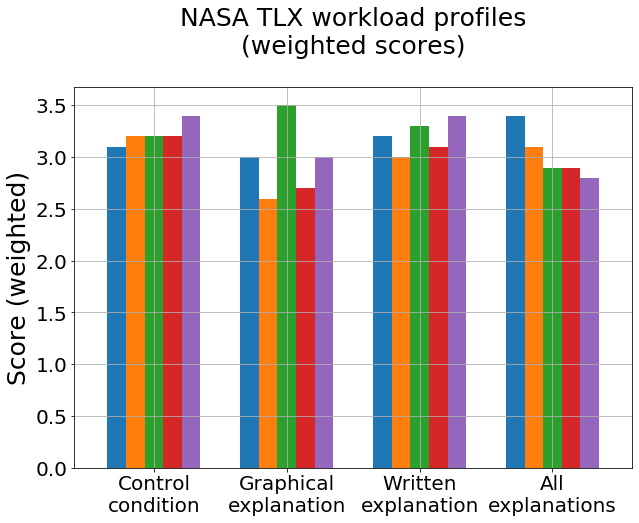

In [254]:
plt.rcParams['figure.figsize'] = [10, 7]
df_tlx = df_nasa[godspeed_pi + ["Condition"]]
df_tlx_g = df_tlx.groupby("Condition").mean()
df_tlx_g.reset_index(inplace=True)
ax = df_tlx_g.plot(x="Condition", y=godspeed_pi, kind="bar", align='center', width=.7)
ax.set(xlabel='', ylabel='Score (weighted)')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.legend(loc="best",bbox_to_anchor=(0.8, 0., 0.5, 1), labels = ["Mental", "Physical", "Temporal", "Performance", "Effort", "Frustration"], fontsize = 15)#tlx_all, ['label1', 'label2', 'label3','label3','label3','label3'])
plt.title("NASA TLX workload profiles\n(weighted scores)\n", fontsize=25)
plt.xticks(rotation = 0)
#ax.get_legend().remove()
plt.grid()
plt.show()

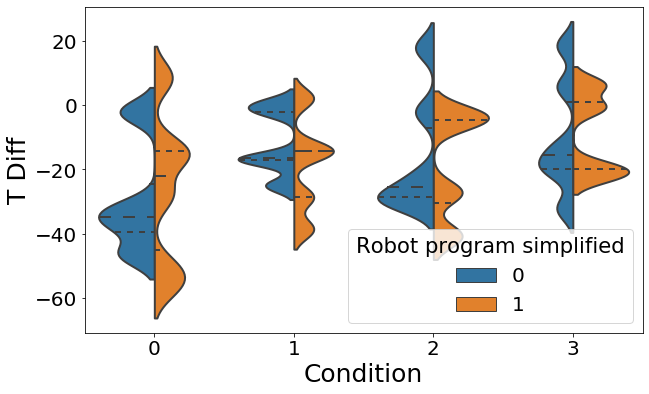

In [307]:
sb.violinplot(x="Condition", y="T Diff", data=df_final, inner="quartile", hue="Robot program simplified", split=True, linewidth=2, bw=0.2)

In [290]:
df_final.groupby("Education").count()

,ID,Condition,Age,Gender,Nationality,Robot interaction,Robot movies,Robot control,Robot program,NASA Mental rating,...,R2 yellow itchy zone all correctsort,R2 red prevention zone all correctsort,R2 green prevention zone all correctsort,R2 yellow prevention zone all correctsort,R2 red robot zone all correctsort,R2 green robot zone all correctsort,R2 yellow robot zone all correctsort,R2 red cleanup zone all correctsort,R2 green cleanup zone all correctsort,R2 yellow cleanup zone all correctsort
Education,,,,,,,,,,,,,,,,,,,,,
BSc,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
HighSchool,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
MSc,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [289]:
18/40

0.45

# ==============================
# Final data set and additional analysis
# -----------------------------------------------------

In [315]:
df_final.head()
print([col for col in df_final if 'T Diff ' in col])

['T Diff Dependable', 'T Diff Reliable', 'T Diff -R- Unresponsive', 'T Diff Predictable', 'T Diff ActConsistently', 'T Diff FunctionSuccessfully', 'T Diff -R- Malfunction', 'T Diff -R- HaveErrors', 'T Diff ProvideFeedback', 'T Diff MeetTheNeeds', 'T Diff ProvideAppropriateInformation', 'T Diff CommunicateWithPeople', 'T Diff Perform exactly as instructed', 'T Diff Follow Directions']


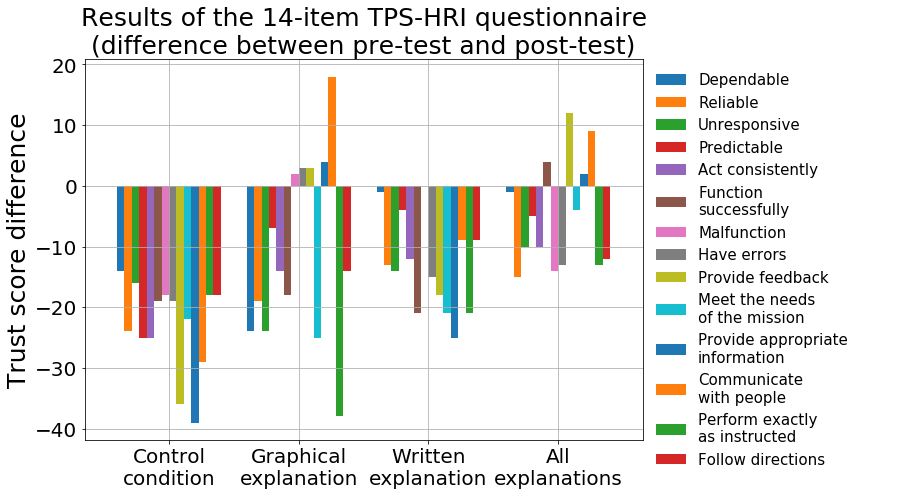

In [343]:
t_diff = [col for col in df_final if 'T Diff ' in col]
t_diff_label = [col[7:] if '-R-' not in col else col[11:] for col in t_diff]
plt.rcParams['figure.figsize'] = [10, 7]
df_trust_diff = df_final[["Condition"] + t_diff]
df_trust_diff_g = df_trust_diff.groupby("Condition").mean()
df_trust_diff_g.reset_index(inplace=True)
ax = df_trust_diff_g.plot(x="Condition", y=t_diff, kind="bar", align='center', width=.8)
ax.set(xlabel='', ylabel='Trust score difference')
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
t_diff_label = ["Dependable", "Reliable", "Unresponsive", "Predictable", "Act consistently", "Function\nsuccessfully",
               "Malfunction", "Have errors", "Provide feedback", "Meet the needs\nof the mission",
                "Provide appropriate\ninformation", "Communicate\nwith people", "Perform exactly\nas instructed",
               "Follow directions"]
ax.legend(ncol=1, frameon=False, mode="expand",loc="best", 
          bbox_to_anchor=(1, 0, 0.5, 1), labels = t_diff_label, fontsize = 15)
plt.title("Results of the 14-item TPS-HRI questionnaire\n(difference between pre-test and post-test)", fontsize=25)
plt.xticks(rotation = 0)
#ax.get_legend().remove()
plt.grid()
plt.show()

In [347]:
df_tcp_hri_14_vis = df_trust_diff[df_trust_diff["Condition"] == 1]
df_tcp_hri_14_wri = df_trust_diff[df_trust_diff["Condition"] == 2]
df_tcp_hri_14_all = df_trust_diff[df_trust_diff["Condition"] == 3]
df_tcp_hri_14_con = df_trust_diff[df_trust_diff["Condition"] == 0]

for t in t_diff:
    print(t)
    print("Kruskal-Wallis: ", stats.kruskal(df_tcp_hri_14_vis[t], df_tcp_hri_14_wri[t], df_tcp_hri_14_all[t], df_tcp_hri_14_con[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_con[t], df_tcp_hri_14_vis[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_con[t], df_tcp_hri_14_wri[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_con[t], df_tcp_hri_14_all[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_vis[t], df_tcp_hri_14_wri[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_vis[t], df_tcp_hri_14_all[t]))
    print("\tMann-Whitney U-test: ", stats.mannwhitneyu(df_tcp_hri_14_all[t], df_tcp_hri_14_wri[t]))

T Diff Dependable
Kruskal-Wallis:  KruskalResult(statistic=4.119013683010273, pvalue=0.24889626494611236)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=46.5, pvalue=0.409355106787271)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=36.5, pvalue=0.16141169450971476)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=37.0, pvalue=0.1698771254983698)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=28.0, pvalue=0.05068664234321359)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=27.0, pvalue=0.04184264045742794)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=42.5, pvalue=0.29646167787402233)
T Diff Reliable
Kruskal-Wallis:  KruskalResult(statistic=1.2471836346336864, pvalue=0.7417113713212855)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=42.0, pvalue=0.2831696528331258)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=35.0, pvalue=0.1332326421566336)
	Mann-Whitney U-test:  MannwhitneyuResult(statistic=40.0, pvalue=0.23499618658617855)
	Mann-Whitney U-test:

In [349]:
stats.spearmanr(df_tcp_hri_14_con["T Diff ProvideAppropriateInformation"], df_tcp_hri_14_vis["T Diff CommunicateWithPeople"])

SpearmanrResult(correlation=0.07835943633125804, pvalue=0.8296373608360617)

In [360]:
Robotpicks = (df_final["G2 RobotScore"] + df_final["G2 RobotMistake"])/2
Robotpicks.head()
Userpicks = (df_final["G2 UserScore"] + df_final["G2 UserMistake"])
final

0    18.0
1    16.0
2     8.0
3    15.0
4    20.0
dtype: float64

In [361]:
Userpicks = (df_final["G2 UserScore"] + df_final["G2 UserMistake"])
Userpicks.head()

0    22
1    24
2    32
3    25
4    20
dtype: int64

In [363]:
df_final["Robotpick ratio"]

0     45.00
1     40.00
2     20.00
3     37.50
4     50.00
5     40.00
6     37.50
7     45.00
8     35.00
9     40.00
10    37.50
11    35.00
12    40.00
13    42.50
14    40.00
15    42.50
16    27.50
17    27.50
18    40.00
19    37.50
20    35.00
21    42.50
22     7.50
23    37.50
24    32.50
25    21.25
26    35.00
27    32.50
28    30.00
29    22.50
30    35.00
31    27.50
32     5.00
33    40.00
34    37.50
35    17.50
36    40.00
37    45.00
38    40.00
39    25.00
Name: Robotpick ratio, dtype: float64

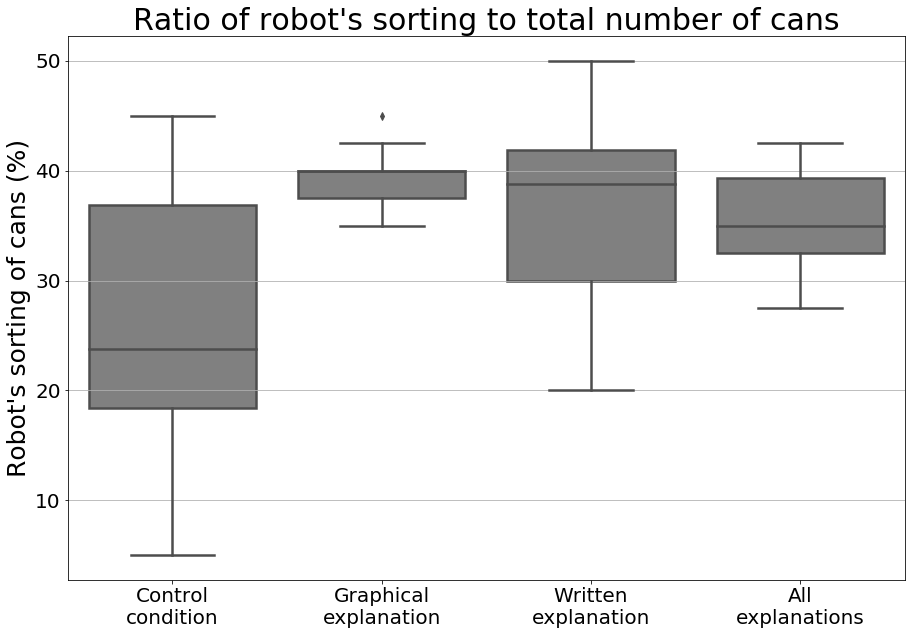

In [369]:
plt.rcParams['figure.figsize'] = [15, 10]
ax = sb.boxplot(x="Condition", y="Robotpick ratio", data=df_final, color='grey', linewidth=2.5)
ax.set(xlabel='', ylabel="Robot's sorting of cans (%)")
ax.set_xticklabels(['Control\ncondition', 'Graphical\nexplanation', 'Written\nexplanation', 'All\nexplanations'])
ax.grid(axis='y')
plt.title("Ratio of robot's sorting to total number of cans", fontsize=30)
plt.show()

In [367]:
normalityCheck(df_final["Robotpick ratio"], "Robotpick ratio")

--------Robotpick ratio--------
D = 0.207, p = 0.0556
W = 0.884, p = 0.001
